In [1]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])


## Pseudo code used: pseudo code in class 


In [3]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


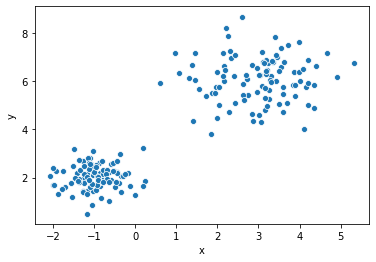

In [4]:
#plt.figure(figsize=(10,10))
sn.scatterplot(dataset['x'],dataset['y'])


In [5]:
Data_xy=dataset.drop('c', axis=1)

In [6]:
Norm=np.linalg.norm

In [7]:
def Kmeans(data,k):
    #Classes=[[] for i in range(k)] # Initializing two empty calsses. Note that we create k classes in general. 
    indexes=np.random.choice(data.shape[0],k, replace=False) # Choosing random indexes to initilize the centers.
    Centers=np.array([[data.iloc[:,j][indexes[i]] for j in range(data.shape[1])] for i in range(k)])# Initializing the centers.
    Points_check_convergence=np.array([[np.random.random() for j in range(data.shape[1])] for i in range(k)]) # Creating points which allow us to enter in the while 
    #loop and are used to check wether there is convergence or not. This will work because the probability that those
    #points are exactly the ones in the initialization is very little.

    # Now we start our while-no-convergence loop
    Max_iter, num_iter=200,0 # Maximal number of iterations in the while-loop
    while((Points_check_convergence != Centers).any() or num_iter<Max_iter):
        Classes=[[] for i in range(k)]
        Points_check_convergence=Centers # Checking points updated
        for i in range(data.shape[0]): # Here we go through all the points of the data set and compute their distance to the centers
            P=np.array([data.iloc[i,j] for j in range(data.shape[1])]) 
            distances=[]
            for l in range(k):
                distances.append(Norm(P-Centers[l]))
            Classes[distances.index(min(distances))].append(P) # Adding the point to the "closest"  class
        for s in range(k):
            Centers[s]=(1.0/len(Classes[s]))*sum(Classes[s])
        num_iter += 1
    return Classes # Returning the clusters


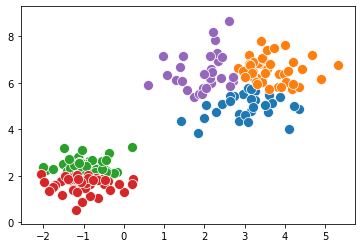

In [9]:
K=5
Kmeans(Data_xy,k=K)
Classes = Kmeans(Data_xy,k=K)
for i in range(K):
    sn.scatterplot(np.array(Classes[i])[:,0], np.array(Classes[i])[:,1], marker='o',s=100)

In [13]:
Kmeans(Data_xy,k=K)

[[array([-0.43560742,  2.23044423]),
  array([-0.50546377,  2.28217626]),
  array([-0.44614588,  2.17673881]),
  array([-0.54127053,  2.27333242])],
 [array([0.98228135, 7.15668893]), array([1.46693128, 7.15805157])],
 [array([3.31511117, 6.20983914]),
  array([3.43836524, 6.02580759]),
  array([3.27960539, 6.04477469]),
  array([3.30866767, 5.966073  ])],
 [array([1.99528365, 4.48492432]),
  array([1.41344824, 4.34139529]),
  array([1.85118774, 3.82339137])],
 [array([2.83592471, 6.65366231]),
  array([2.96361746, 6.53422496]),
  array([3.21045073, 6.4772343 ]),
  array([3.18833121, 6.28781043]),
  array([3.18264738, 6.41253272])],
 [array([1.30159851, 6.14024687]),
  array([1.05870032, 6.34947641]),
  array([1.39114964, 6.66414561]),
  array([0.60442799, 5.91608476]),
  array([1.45269461, 6.0643194 ])],
 [array([-0.87772801,  1.89636026]),
  array([-0.84262311,  1.64360028]),
  array([-0.84391503,  1.80563603]),
  array([-0.89136743,  1.79713524]),
  array([-0.86724421,  1.85200807])